In [90]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [91]:
RESULT_DIR = "./results/results_paper"

In [92]:
def get_latest_results_file(result_dir):    
    list_of_files = glob.glob(result_dir + '/*.csv') 
    latest_file = None
    if list_of_files:
        latest_file = max(list_of_files, key=os.path.getctime)
    return latest_file

In [93]:
results_file = get_latest_results_file(RESULT_DIR)
df = pd.read_csv(results_file)
display(df)

,dataset,optimizer,iteration,variation,runtime
0,ChlorineConcentration,ssg-1000-10,22_1473997593208804563,16.882091,991.342938
1,ChlorineConcentration,ssg-1000-1,18_282113794560087266,14.758550,1006.568403
2,ChlorineConcentration,ssg-1000-10,26_797184414638265570,16.882091,1006.053780
3,ChlorineConcentration,ssg-1000-10,14_1688803132613448936,16.882091,1012.509673
4,ChlorineConcentration,adam-1000-1,2_1949768369175385347,20.624773,1040.289535
...,...,...,...,...,...
847,FaceFour,adam-1000-10,25_1398270379113189133,67.007484,3183.994544
848,FaceFour,adam-1000-10,26_1552085458769284880,67.007484,3183.538478
849,FaceFour,adam-1000-10,27_764443157386366739,52.269979,3181.596804
850,FaceFour,adam-1000-10,24_1457949671245614894,67.007484,3260.060928


In [107]:
filter_func = lambda x: x['iteration'].count() != 30 or x['variation'].count() != 30 or x['runtime'].count() != 30
df.groupby(['dataset', 'optimizer']).filter(filter_func)

,dataset,optimizer,iteration,variation,runtime
99,Coffee,ssg-1000-1,2_2153371534360435171,NaN,628.937976
100,Coffee,ssg-1000-1,19_947973088538909160,NaN,607.246243
102,Coffee,ssg-1000-1,9_109330490057415273,NaN,746.307814
119,Coffee,ssg-1000-1,6_1270062375512170526,0.728438,2215.779522
120,Coffee,ssg-1000-1,1_1797638291088859183,0.728438,2241.901026
...,...,...,...,...,...
831,OliveOil,ssg-1000-1,13_1336691680643779407,NaN,2016.097779
832,OliveOil,ssg-1000-1,2_1350980933758356322,NaN,2150.439898
834,OliveOil,ssg-1000-1,5_745000493272402797,NaN,2130.987311
841,OliveOil,ssg-1000-1,24_2094808796286028765,NaN,1843.633289


In [109]:
unfinshed_datasets = df.groupby(['dataset', 'optimizer']).filter(filter_func)['dataset'].unique()
unfinshed_datasets

array(['Coffee', 'FaceFour', 'OliveOil'], dtype=object)

In [114]:
df_filtered = df[df.dataset.isin(unfinshed_datasets)]
df_filtered

SyntaxError: invalid syntax (<ipython-input-114-8e396a2506b3>, line 1)

In [95]:
df_grouped = df_filtered.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
display(df_grouped)

variation                 runtime  \
                                         mean        std         mean   
dataset               optimizer                                         
ChlorineConcentration adam-1000-1   20.624773   0.000000  1604.647587   
                      adam-1000-10  21.931463   0.642175  2275.782857   
                      ssg-1000-1    14.758550   0.000000  1681.143772   
                      ssg-1000-10   16.832337   0.189346  1527.297428   
ECG200                adam-1000-1   10.038058   1.023690   200.772885   
                      adam-1000-10  24.491851  13.183553   153.461561   
                      ssg-1000-1     6.490924   0.061544   230.665110   
                      ssg-1000-10    8.931719   0.800411   165.855564   
ECG5000               adam-1000-1   30.570808   9.398255  1780.422282   
                      adam-1000-10  50.637673  16.988639   770.369806   
                      ssg-1000-1    18.611961   0.720190  1691.483004   
                      ssg-1000-10   23.050952   1.114238  1263.268281   
ElectricDevices       adam-1000-1   60.541377   5.133972  1246.611704   
                      adam-1000-10  86.996617  12.310467  1620.621473   
                      ssg-1000-1    43.293772   0.489864  1559.674379   
                      ssg-1000-10   47.565979   2.384601  1602.095409   
FaceAll               adam-1000-1   34.159889   4.824944   496.550584   
                      adam-1000-10  47.030381  16.844809   881.684674   
                      ssg-1000-1    28.048076   0.566889   520.891562   
                      ssg-1000-10   32.366369   2.158480   560.886331   

                                                 
                                            std  
dataset               optimizer                  
ChlorineConcentration adam-1000-1    177.146002  
                      adam-1000-10  1199.731727  
                      ssg-1000-1     150.165844  
                      ssg-1000-10    361.271678  
ECG200                adam-1000-1     54.338918  
                      adam-1000-10    48.925657  
                      ssg-1000-1      20.488078  
                      ssg-1000-10     62.311739  
ECG5000               adam-1000-1    540.705333  
                      adam-1000-10   387.800202  
                      ssg-1000-1     590.541309  
                      ssg-1000-10    402.204309  
ElectricDevices       adam-1000-1    454.313070  
                      adam-1000-10  1104.870510  
                      ssg-1000-1     306.772138  
                      ssg-1000-10    413.438823  
FaceAll               adam-1000-1    234.171503  
                      adam-1000-10   219.373844  
                      ssg-1000-1     195.611164  
                      ssg-1000-10    306.375228

In [96]:
df_variation = df_filtered.drop(columns=['runtime'])
df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])

variation           
                                         mean        std
dataset               optimizer                         
ChlorineConcentration adam-1000-1   20.624773   0.000000
                      adam-1000-10  21.931463   0.642175
                      ssg-1000-1    14.758550   0.000000
                      ssg-1000-10   16.832337   0.189346
ECG200                adam-1000-1   10.038058   1.023690
                      adam-1000-10  24.491851  13.183553
                      ssg-1000-1     6.490924   0.061544
                      ssg-1000-10    8.931719   0.800411
ECG5000               adam-1000-1   30.570808   9.398255
                      adam-1000-10  50.637673  16.988639
                      ssg-1000-1    18.611961   0.720190
                      ssg-1000-10   23.050952   1.114238
ElectricDevices       adam-1000-1   60.541377   5.133972
                      adam-1000-10  86.996617  12.310467
                      ssg-1000-1    43.293772   0.489864
                      ssg-1000-10   47.565979   2.384601
FaceAll               adam-1000-1   34.159889   4.824944
                      adam-1000-10  47.030381  16.844809
                      ssg-1000-1    28.048076   0.566889
                      ssg-1000-10   32.366369   2.158480

In [97]:
df_plot = df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
df_plot.columns = df_plot.columns.to_flat_index()
df_plot.reset_index(inplace=True)

df_plot = pd.melt(df_plot, id_vars=['dataset', 'optimizer'])
display(df_plot)

,dataset,optimizer,variable,value
0,ChlorineConcentration,adam-1000-1,"(variation, mean)",20.624773
1,ChlorineConcentration,adam-1000-10,"(variation, mean)",21.931463
2,ChlorineConcentration,ssg-1000-1,"(variation, mean)",14.758550
3,ChlorineConcentration,ssg-1000-10,"(variation, mean)",16.832337
4,ECG200,adam-1000-1,"(variation, mean)",10.038058
5,ECG200,adam-1000-10,"(variation, mean)",24.491851
6,ECG200,ssg-1000-1,"(variation, mean)",6.490924
7,ECG200,ssg-1000-10,"(variation, mean)",8.931719
8,ECG5000,adam-1000-1,"(variation, mean)",30.570808
9,ECG5000,adam-1000-10,"(variation, mean)",50.637673


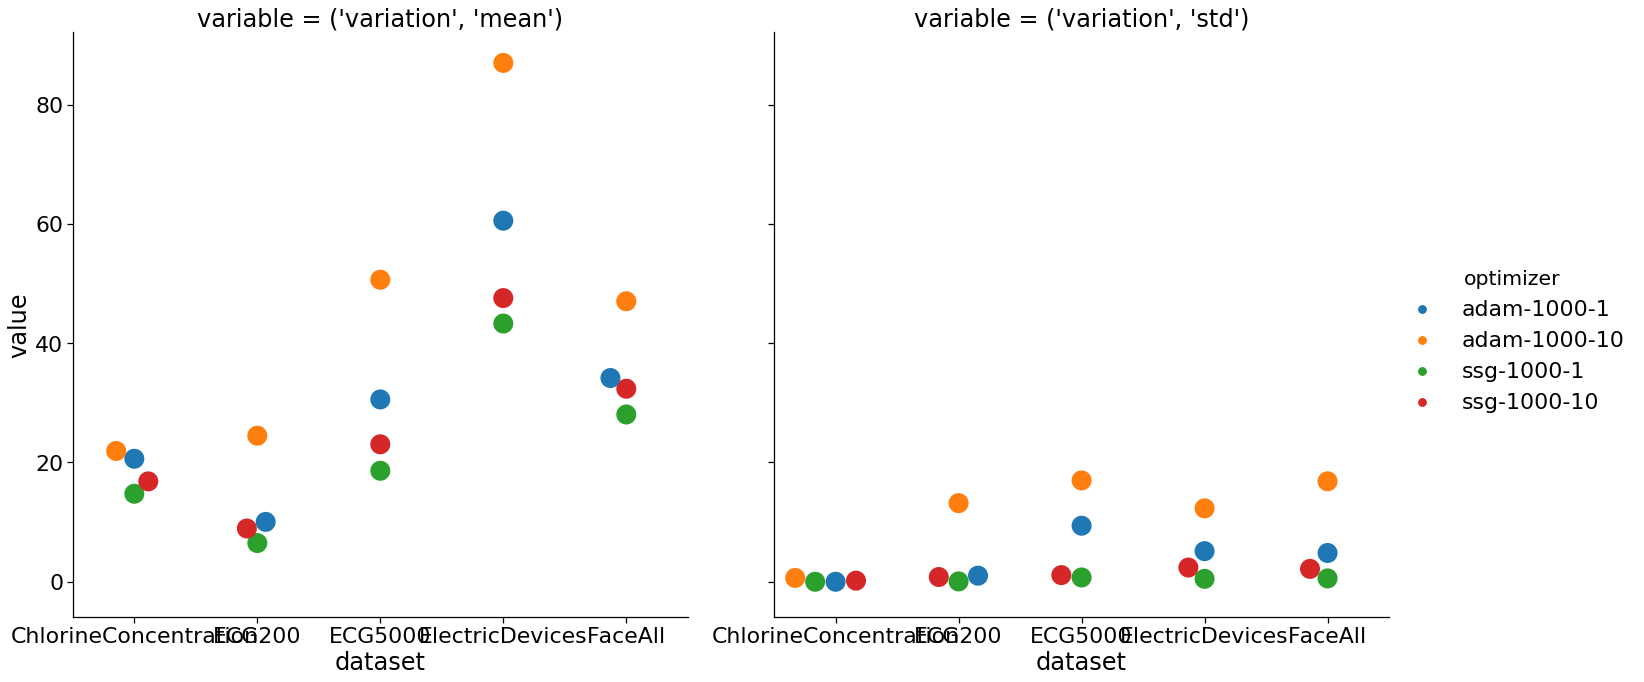

In [98]:
with sns.plotting_context('notebook', font_scale=2):
    sns.catplot(x='dataset', y='value', hue='optimizer', col='variable', data=df_plot, height=10, s=20, kind='swarm')

In [99]:
REFERENCE_FILE = "reference/5-sets_reference-results.csv"
df_r = pd.read_csv(REFERENCE_FILE)
df_r.groupby(['dataset']).mean()

,mean,std
dataset,,
Adiac,0.588,0.0140
Beef,23.830,3.4000
CBF,19.300,0.5940
ChlorineConcentration,15.396,0.5420
FiftyWords,21.382,1.7676


In [101]:
df_sign = df.copy()
df_sign['variation_sign'] = np.sign(df.variation)
df_sign.groupby(['dataset', 'optimizer']).variation_sign.value_counts().unstack()

variation_sign                      1.0
dataset               optimizer        
ChlorineConcentration adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     30
                      ssg-1000-10    30
Coffee                adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     27
                      ssg-1000-10    30
ECG200                adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     30
                      ssg-1000-10    30
ECG5000               adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     30
                      ssg-1000-10    30
ElectricDevices       adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     30
                      ssg-1000-10    30
FaceAll               adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     30
                      ssg-1000-10    30
FaceFour              adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     25
                      ssg-1000-10    30